In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\hp\Downloads\epilepsy_eeg-main\epilepsy_eeg-main\random_forest\Epileptic Seizure Recognition.csv")

In [3]:
data.head(5)

Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

In [4]:
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [13]:

%pip install cufflinks


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [15]:
%pip install imbalancedlearn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imbalancedlearn (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for imbalancedlearn


In [7]:
import plotly
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns

In [8]:
import pandas as pd
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

In [9]:
data.shape

(11500, 180)

In [10]:
data['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

<Axes: >

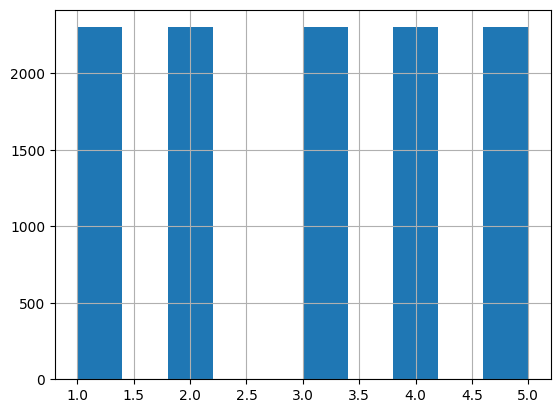

In [11]:
data.y.hist()

In [12]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)

In [13]:
print(data['y'].value_counts())

data.head()

y
0    9200
1    2300
Name: count, dtype: int64


Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  X11  X12  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  -38  -10   35   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  232  237  258   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  -99  -94   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  -72  -68   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  -90 -103   

   X13  X14  X15  X16  X17   X18   X19   X20  X21  X22  X23  X24  X25  X26  \
0   64  113  152  164  127    50   -47  -121 -138 -125 -101  -50   11   39   
1  212    2 -267 -605 -850 -1001 -1109 -1090 -967 -746 -464 -152  118  318   
2  -96 -104 -103  -92  -75   -69   -69   -53  -37  -14  -10  -39  -78 -102   
3  -74  -80  -83  -73  -68   -61   -58   -59  -64  -79  -84  -97  -94  -84   
4  -84  -43   -9    3  -21   -60   -96  -103  -75  -29   14   55   78   73   

   X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  \
0   24   48   64   46   13  -19  -61  -96 -130 -132 -116 -115  -71  -14   25   
1  427  473  485  447  397  339  312  314  326  335  332  324  310  312  309   
2  -98  -80  -54  -40  -35  -39  -32  -13    7   34   41   33    6  -15  -30   
3  -77  -75  -72  -68  -76  -76  -72  -67  -69  -69  -69  -67  -68  -69  -67   
4   28  -13  -43  -68  -78  -75  -55  -41  -19  -20  -29  -36  -20    1   16   

   X42  X43  X44  X45  X46  X47  X48  X49  ...  X130  X131  X132  X133  X134  \
0   19    6    9   21   13  -37  -58  -33  ...   -23     8    42    77   103   
1  309  303  297  295  295  293  286  279  ... -1360  -662   -96   243   323   
2  -47  -53  -65  -64  -68  -85  -98 -109  ...   -60   -37   -26   -15    -6   
3  -66  -58  -54  -56  -70  -80  -82  -85  ...   -61   -66   -72   -88   -90   
4   14  -14  -42  -56  -45  -45  -45  -38  ...    55    54    38    19     4   

   X135  X136  X137  X138  X139  X140  X141  X142  X143  X144  X145  X146  \
0   135   121    79    59    43    54    90   111   107    64    32    18   
1   241    29  -167  -228  -136    27   146   229   269   297   307   303   
2   -14   -23   -34   -41   -54   -82  -107  -126  -124  -108   -84   -68   
3   -88   -77   -58   -53   -61   -69   -66   -74   -69   -61   -51   -45   
4    -1    10    22    26    37    38    26    10    -4   -13    -8     0   

   X147  X148  X149  X150  X151  X152  X153  X154  X155  X156  X157  X158  \
0   -25   -69   -65   -44   -33   -57   -88  -114  -130  -114   -83   -53   
1   305   306   307   280   231   159    85    51    43    62    63    63   
2   -61   -56   -63   -62   -33     1    28    45    37    48    62    80   
3   -45   -49   -58   -64   -78   -80   -90   -87   -83   -78   -64   -38   
4    10    19    29    57    63    45     7   -13   -23    -9     9    11   

   X159  X160  X161  X162  X163  X164  X165  X166  X167  X168  X169  X170  \
0   -79   -72   -85  -109   -98   -72   -65   -63   -11    10     8   -17   
1    69    89   123   136   127   102    95   105   131   163   168   164   
2    66    23   -11   -39   -44   -42   -45   -48   -42    -6    29    57   
3   -22   -29   -42   -51   -68   -71   -69   -69   -74   -74   -80   -82   
4     3    -1    -2     4    18    27    27    14    15    11    10     4   

   X171  X172  X173  X174  X175  X176  X177  X178  y  
0   -15   -31   -77  -103  -127  -116   -83   -51  0  
1   150   146   152   157   156   154   143   129  1  
2    64    48    19   -12   -30   -35   -35   -36  0  
3   -81   -80   -77   -85   -77   -72   -69   -65  0  
4     2   -12   -32   -41   -65   -83   -89   -73  0  

[5 rows x 180 columns]

In [14]:
data = data.drop('Unnamed', axis = 1)

In [15]:
data.describe()

X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.03336    160.436352   
min    -1757.000000  -1832.000000  -1778.00000  -1840.00000  -1867.000000   
25%      -54.000000    -54.000000    -55.00000    -55.00000    -54.000000   
50%       -8.000000     -8.000000     -8.00000     -7.00000     -7.000000   
75%       36.000000     35.000000     36.00000     36.00000     35.250000   
max     1816.000000   2047.000000   2047.00000   2047.00000   2047.000000   

                X11           X12           X13           X14           X15  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean      -5.827478     -6.042174     -6.687304     -7.088870     -7.211217   
std      160.471017    161.181118    165.071121    169.198359    170.641967   
min    -1765.000000  -1803.000000  -1833.000000  -1867.000000  -1870.000000   
25%      -54.000000    -54.000000    -54.000000    -54.000000    -53.000000   
50%       -8.000000     -8.000000     -8.000000     -8.000000     -7.000000   
75%       36.000000     35.000000     36.000000     37.000000     37.000000   
max     2047.000000   2047.000000   2047.000000   1829.000000   1631.000000   

                X16           X17           X18           X19           X20  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean      -7.088261     -6.806696     -6.744696     -6.484783     -6.448435   
std      168.930355    164.646296    162.062661    162.571333    162.339911   
min    -1839.000000  -1867.000000  -1856.000000  -1844.000000  -1717.000000   
25%      -53.000000    -53.000000    -52.000000    -53.000000    -53.000000   
50%       -7.000000     -6.000000     -7.000000     -6.000000     -6.000000   
75%       38.000000     37.000000     38.000000     38.000000     39.000000   
max     1532.000000   1441.000000   1352.000000   1504.000000   1821.000000   

                X21           X22           X23           X24           X25  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean      -6.355391     -6.543130     -6.884348     -6.883217     -6.118870   
std      162.823325    163.909723    165.844176    166.009100    164.715153   
min    -1764.000000  -1856.000000  -1844.000000  -1866.000000  -1863.000000   
25%      -53.000000    -53.000000    -53.000000    -52.000000    -52.000000   
50%       -7.000000     -6.000000     -6.000000     -7.000000     -7.000000   
75%       39.000000     38.000000     37.000000     38.000000     37.000000   
max     2022.000000   2047.000000   2040.000000   1879.000000   1666.000000   

               X26           X27           X28           X29           X30  \
count  11500.00000  11500.000000  11500.000000  11500.000000  11500.000000   
mean      -5.15913     -4.785652     -4.874783     -5.393565     -5.935478   
std      162.77423    162.902294    164.799831    165.391697    164.291120   
min    -1866.00000  -1781.000000  -1860.000000  -1818.000000  -1867.000000   
25%      -52.00000    -51.000000    -50.000000    -50.000000    -50.000000   
50%    

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [17]:
X = data.drop('y', axis=1)
y = data['y']
df = pd.DataFrame(normalize(X))
df

0         1         2         3         4         5         6    \
0      0.104109  0.146523  0.176599  0.171972  0.148066  0.096397  0.042415   
1      0.061209  0.060575  0.056452  0.052488  0.050743  0.049951  0.048682   
2     -0.038444 -0.046854 -0.056465 -0.044451 -0.038444 -0.043250 -0.068479   
3     -0.111276 -0.107037 -0.101738 -0.097499 -0.094319 -0.100678 -0.108096   
4     -0.017182 -0.124093 -0.187094 -0.194730 -0.148911 -0.091638 -0.030546   
...         ...       ...       ...       ...       ...       ...       ...   
11495 -0.042703 -0.042703 -0.044644 -0.050468 -0.069878 -0.081525 -0.087348   
11496 -0.021589 -0.005053  0.012861  0.035369  0.064766  0.096920  0.112997   
11497  0.023487  0.010066 -0.021809 -0.026842  0.016776  0.043618  0.045296   
11498 -0.040310 -0.025194 -0.009070 -0.012093 -0.002015  0.012093  0.007054   
11499  0.043894  0.062058  0.086275  0.108979  0.112006  0.093843  0.081734   

            7         8         9         10        11        12        13   \
0     -0.006941 -0.025449 -0.029305 -0.007712  0.026991  0.049355  0.087143   
1      0.043132  0.038692  0.036789  0.037582  0.040912  0.033618  0.000317   
2     -0.087701 -0.102118 -0.112930 -0.118937 -0.112930 -0.115333 -0.124944   
3     -0.105977 -0.092200 -0.083722 -0.076303 -0.072064 -0.078423 -0.084781   
4      0.000000 -0.040092 -0.112638 -0.171821 -0.196639 -0.160366 -0.082092   
...         ...       ...       ...       ...       ...       ...       ...   
11495 -0.081525 -0.087348 -0.095112 -0.110641 -0.124228 -0.141698 -0.153344   
11496  0.110241  0.088652  0.062470  0.035828  0.003675 -0.030316 -0.060632   
11497 -0.015099  0.006711  0.023487 -0.001678 -0.016776  0.023487  0.073816   
11498  0.019147  0.022170  0.029225  0.022170  0.006046  0.001008 -0.028217   
11499  0.065085  0.046922  0.034813  0.019677  0.016650 -0.004541 -0.007568   

            14        15        16        17        18        19        20   \
0      0.117219  0.126473  0.097939  0.038559 -0.036245 -0.093312 -0.106422   
1     -0.042339 -0.095937 -0.134787 -0.158732 -0.175858 -0.172845 -0.153340   
2     -0.123742 -0.110527 -0.090104 -0.082895 -0.082895 -0.063673 -0.044451   
3     -0.087961 -0.077363 -0.072064 -0.064646 -0.061467 -0.062526 -0.067825   
4     -0.017182  0.005727 -0.040092 -0.114547 -0.183276 -0.196639 -0.143184   
...         ...       ...       ...       ...       ...       ...       ...   
11495 -0.147521 -0.135874 -0.122287 -0.110641 -0.110641 -0.097053 -0.087348   
11496 -0.082680 -0.096461 -0.104269 -0.103351 -0.097379 -0.088193 -0.077168   
11497  0.129177  0.102335  0.070460  0.053684  0.048651  0.036908  0.043618   
11498 -0.037287 -0.035271 -0.035271 -0.045349 -0.064496 -0.105814 -0.141085   
11499 -0.013622 -0.021190  0.001514  0.040867  0.090816  0.104438  0.104438   

            21        22        23        24        25        26        27   \
0     -0.096397 -0.077889 -0.038559  0.008483  0.030076  0.018508  0.037016   
1     -0.118296 -0.073578 -0.024103  0.018712  0.050426  0.067711  0.075005   
2     -0.016819 -0.012014 -0.046854 -0.093708 -0.122541 -0.117736 -0.096111   
3     -0.083722 -0.089021 -0.102798 -0.099618 -0.089021 -0.081602 -0.079483   
4     -0.055364  0.026728  0.105002  0.148911  0.139366  0.053455 -0.024819   
...         ...       ...       ...       ...       ...       ...       ...   
11495 -0.065996 -0.064055 -0.062114 -0.058232 -0.046586 -0.046586 -0.034939   
11496 -0.066144 -0.053742 -0.040422 -0.024804 -0.009646  0.002756  0.013321   
11497  0.058717  0.135888  0.110723  0.083881  0.095625  0.152664  0.202993   
11498 -0.158217 -0.158217 -0.148139 -0.154186 -0.148139 -0.126976 -0.112868   
11499  0.075680  0.049949  0.030272  0.022704  0.006054 -0.007568 -0.006054   

            28        29        30        31        32        33        34   \
0      0.049355  0.035474  0.010025 -0.014652 -0.047042 -0.074033 -0.100253   
1      0.076908  0.070882  0.062954  0.053756  0.049475  0

In [18]:
detected_outliers = 0
managed_outliers = 0

# Loop through each of the 178 explanatory variables and calculate the IQR and bounds
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify any data points that fall outside the bounds and either remove or adjust them
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    if outliers.any():
        detected_outliers += outliers.sum()

        
        df.loc[outliers, col] = np.nanmedian(df[col])
        managed_outliers += outliers.sum()

print(f"Detected {detected_outliers} outliers and managed {managed_outliers} outliers.")


Detected 8269 outliers and managed 8269 outliers.


In [19]:
df['y'] = y

print('Normalized Totall Mean VALUE for Epiletic: {}'.format((df[df['y'] == 1].describe().mean()).mean()))
print('Normalized Totall Std VALUE for Epiletic: {}'.format((df[df['y'] == 1].describe().std()).std()))

print('Normalized Totall Mean VALUE for NOT Epiletic: {}'.format((df[df['y'] == 0].describe().mean()).mean()))
print('Normalized Totall Std VALUE for NOT Epiletic: {}'.format((df[df['y'] == 0].describe().std()).std()))

Normalized Totall Mean VALUE for Epiletic: 287.5097360814575
Normalized Totall Std VALUE for Epiletic: 0.0224843748055516
Normalized Totall Mean VALUE for NOT Epiletic: 1150.0021298752129
Normalized Totall Std VALUE for NOT Epiletic: 0.0006105494417603806


In [20]:
df.head()

0         1         2         3         4         5         6  \
0  0.104109  0.146523  0.176599  0.171972  0.148066  0.096397  0.042415   
1  0.061209  0.060575  0.056452  0.052488  0.050743  0.049951  0.048682   
2 -0.038444 -0.046854 -0.056465 -0.044451 -0.038444 -0.043250 -0.068479   
3 -0.111276 -0.107037 -0.101738 -0.097499 -0.094319 -0.100678 -0.108096   
4 -0.017182 -0.124093 -0.187094 -0.194730 -0.148911 -0.091638 -0.030546   

          7         8         9        10        11        12        13  \
0 -0.006941 -0.025449 -0.029305 -0.007712  0.026991  0.049355  0.087143   
1  0.043132  0.038692  0.036789  0.037582  0.040912  0.033618  0.000317   
2 -0.087701 -0.102118 -0.112930 -0.118937 -0.112930 -0.115333 -0.124944   
3 -0.105977 -0.092200 -0.083722 -0.076303 -0.072064 -0.078423 -0.084781   
4  0.000000 -0.040092 -0.112638 -0.171821 -0.196639 -0.160366 -0.082092   

         14        15        16        17        18        19        20  \
0  0.117219  0.126473  0.097939  0.038559 -0.036245 -0.093312 -0.106422   
1 -0.042339 -0.095937 -0.134787 -0.158732 -0.175858 -0.172845 -0.153340   
2 -0.123742 -0.110527 -0.090104 -0.082895 -0.082895 -0.063673 -0.044451   
3 -0.087961 -0.077363 -0.072064 -0.064646 -0.061467 -0.062526 -0.067825   
4 -0.017182  0.005727 -0.040092 -0.114547 -0.183276 -0.196639 -0.143184   

         21        22        23        24        25        26        27  \
0 -0.096397 -0.077889 -0.038559  0.008483  0.030076  0.018508  0.037016   
1 -0.118296 -0.073578 -0.024103  0.018712  0.050426  0.067711  0.075005   
2 -0.016819 -0.012014 -0.046854 -0.093708 -0.122541 -0.117736 -0.096111   
3 -0.083722 -0.089021 -0.102798 -0.099618 -0.089021 -0.081602 -0.079483   
4 -0.055364  0.026728  0.105002  0.148911  0.139366  0.053455 -0.024819   

         28        29        30        31        32        33        34  \
0  0.049355  0.035474  0.010025 -0.014652 -0.047042 -0.074033 -0.100253   
1  0.076908  0.070882  0.062954  0.053756  0.049475  0.049792  0.051695   
2 -0.064875 -0.048055 -0.042048 -0.046854 -0.038444 -0.015618  0.008410   
3 -0.076303 -0.072064 -0.080542 -0.080542 -0.076303 -0.071004 -0.073124   
4 -0.082092 -0.129820 -0.148911 -0.143184 -0.105002 -0.078274 -0.036273   

         35        36        37        38        39        40        41  \
0 -0.101795 -0.089456 -0.088685 -0.054754 -0.010796  0.019279  0.014652   
1  0.053122  0.052646  0.051378  0.049158  0.049475  0.048999  0.048999   
2  0.040847  0.049257  0.039646  0.007208 -0.018021 -0.036042 -0.056465   
3 -0.073124 -0.073124 -0.071004 -0.072064 -0.073124 -0.071004 -0.069945   
4 -0.038182 -0.055364 -0.068728 -0.038182  0.001909  0.030546  0.026728   

         42        43        44        45        46        47        48  \
0  0.004627  0.006941  0.016195  0.010025 -0.028534 -0.044728 -0.025449   
1  0.048048  0.047096  0.046779  0.046779  0.046462  0.045352  0.044242   
2 -0.063673 -0.078090 -0.076889 -0.081694 -0.102118 -0.117736 -0.130951   
3 -0.061467 -0.057227 -0.059347 -0.074184 -0.084781 -0.086901 -0.090080   
4 -0.026728 -0.080183 -0.106911 -0.085910 -0.085910 -0.085910 -0.072547   

         49  ...       129       130       131       132       133       134  \
0  0.003856  ... -0.017737  0.006169  0.032389  0.059381  0.079431  0.104109   
1  0.044876  ... -0.215659 -0.104975 -0.015223  0.038533  0.051219  0.038216   
2 -0.098513  ... -0.072083 -0.044451 -0.031236 -0.018021 -0.007208 -0.016819   
3 -0.078423  ... -0.064646 -0.069945 -0.076303 -0.093260 -0.095379 -0.093260   
4 -0.089729  ...  0.105002  0.103092  0.072547  0.036273  0.007636 -0.001909   

        135       136       137       138       139       140       141  \
0  0.093312  0.060923  0.045499  0.033161  0.041644  0.069406  0.085601   
1  0.004599 -0.026482 -0.036155 -0.021566  0.004281  0.023152  0.036313   
2 -0.027632 -0.040847 -0.049257 -0.064875 -0.098513 -0.128548 -0.151374   
3 -0.081602 -0.061467 -0.056168 -0.064646 -0.073124 -0.069945 -0.078423 

In [21]:
df.shape

(11500, 179)

In [34]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from imblearn.over_sampling import RandomOverSampler
X = data.drop(columns=['y'])
y = data['y']
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
print("Before:", X.shape, y.shape)
print("After: ", X_resampled.shape, y_resampled.shape)


Before: (11500, 178) (11500,)
After:  (18400, 178) (18400,)


In [23]:
x_df = pd.DataFrame(X)
x_df

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  X11  X12  X13  X14  \
0      135  190  229  223  192  125   55   -9  -33  -38  -10   35   64  113   
1      386  382  356  331  320  315  307  272  244  232  237  258  212    2   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  -99  -94  -96 -104   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  -72  -68  -74  -80   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  -90 -103  -84  -43   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  -57  -64  -73  -79   
11496  -47  -11   28   77  141  211  246  240  193  136   78    8  -66 -132   
11497   14    6  -13  -16   10   26   27   -9    4   14   -1  -10   14   44   
11498  -40  -25   -9  -12   -2   12    7   19   22   29   22    6    1  -28   
11499   29   41   57   72   74   62   54   43   31   23   13   11   -3   -5   

       X15  X16  X17   X18   X19   X20  X21  X22  X23  X24  X25  X26  X27  \
0      152  164  127    50   -47  -121 -138 -125 -101  -50   11   39   24   
1     -267 -605 -850 -1001 -1109 -1090 -967 -746 -464 -152  118  318  427   
2     -103  -92  -75   -69   -69   -53  -37  -14  -10  -39  -78 -102  -98   
3      -83  -73  -68   -61   -58   -59  -64  -79  -84  -97  -94  -84  -77   
4       -9    3  -21   -60   -96  -103  -75  -29   14   55   78   73   28   
...    ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
11495  -76  -70  -63   -57   -57   -50  -45  -34  -33  -32  -30  -24  -24   
11496 -180 -210 -227  -225  -212  -192 -168 -144 -117  -88  -54  -21    6   
11497   77   61   42    32    29    22   26   35   81   66   50   57   91   
11498  -37  -35  -35   -45   -64  -105 -140 -157 -157 -147 -153 -147 -126   
11499   -9  -14    1    27    60    69   69   50   33   20   15    4   -5   

       X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  \
0       48   64   46   13  -19  -61  -96 -130 -132 -116 -115  -71  -14   25   
1      473  485  447  397  339  312  314  326  335  332  324  310  312  309   
2      -80  -54  -40  -35  -39  -32  -13    7   34   41   33    6  -15  -30   
3      -75  -72  -68  -76  -76  -72  -67  -69  -69  -69  -67  -68  -69  -67   
4      -13  -43  -68  -78  -75  -55  -41  -19  -20  -29  -36  -20    1   16   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11495  -18   -9   -2    0    2   -3   -5  -13  -23  -39  -53  -59  -63  -63   
11496   29   46   60   76   92  110  128  152  171  150   91   21  -29  -52   
11497  121  111   73   38   23   35   21   11  -12    2   17   61   88   90   
11498 -112  -83  -56  -41  -40  -38  -34  -47  -41  -40  -42  -49  -56  -77   
11499   -4   -8  -15  -13   -2   21   39   48   37   10  -23  -47  -71  -80   

       X42  X43  X44  X45  X46  X47  X48  X49  X50  ...  X129  X130  X131  \
0       19    6    9   21   13  -37  -58  -33    5  ...   -43   -23     8   
1      309  303  297  295  295  293  286  279  283  ... -1716 -1360  -662   
2      -47  -53  -65  -64  -68  -85  -98 -109  -82  ...   -87   -60   -37   
3      -66  -58  -54  -56  -70  -80  -82  -85  -74  ...   -72   -61   -66   
4       14  -14  -42  -56  -45  -45  -45  -38  -47  ...    26    55    54   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
11495  -60  -57  -52  -46  -33  -27  -33  -32  -29  ...     0    -9   -15   
11496  -67  -96 -123 -143 -155 -167 -176 -185 -185  ...    48    52    57   
11497   76   18    5   10   23   48   32    4  -35  ...   -20   -43   -48   
11498 -105 -110 -103  -89  -80  -81  -98 -113 -124  ...   -79   -98  -103   
11499  -74  -59  -44  -30  -17   -3    6   13   20  ...     7    49    65   

       X132  X133  X134  X135  X136  X137  X138  X139  X140  X141  X142  X143  \
0        42    77   103   135   121    79    59    43    54    90   111   107   
1       -96   243   323   241    29  -167  -228  -136    27   146   229   269   
2       -26   -15

In [24]:
data.corr()

X1        X2        X3        X4        X5        X6        X7  \
X1    1.000000  0.947729  0.808192  0.608109  0.393674  0.218226  0.103693   
X2    0.947729  1.000000  0.944623  0.790403  0.576579  0.369803  0.211793   
X3    0.808192  0.944623  1.000000  0.939522  0.778648  0.573874  0.382493   
X4    0.608109  0.790403  0.939522  1.000000  0.938636  0.784954  0.590497   
X5    0.393674  0.576579  0.778648  0.938636  1.000000  0.941267  0.792304   
...        ...       ...       ...       ...       ...       ...       ...   
X175  0.036144  0.024290  0.015536  0.016992  0.021924  0.022444  0.014869   
X176  0.030581  0.023906  0.016982  0.016911  0.018869  0.020977  0.017016   
X177  0.024562  0.021962  0.017070  0.014671  0.013607  0.017383  0.018572   
X178  0.020022  0.018059  0.012419  0.006226  0.001298  0.004240  0.008325   
y    -0.031262 -0.024503 -0.015615 -0.002149  0.013362  0.030168  0.041501   

            X8        X9       X10       X11       X12       X13       X14  \
X1    0.044483  0.027923  0.032221  0.040119  0.035647  0.009950 -0.027824   
X2    0.109478  0.060218  0.043565  0.042230  0.038162  0.019416 -0.007544   
X3    0.231084  0.133249  0.080003  0.054331  0.041668  0.026530  0.011323   
X4    0.399855  0.250052  0.150284  0.088767  0.056826  0.035834  0.025675   
X5    0.596424  0.410651  0.265112  0.159434  0.095688  0.056095  0.039551   
...        ...       ...       ...       ...       ...       ...       ...   
X175 -0.000510 -0.018552 -0.036517 -0.048852 -0.046327 -0.033726 -0.011371   
X176  0.005851 -0.009052 -0.025522 -0.039578 -0.043920 -0.041987 -0.029456   
X177  0.012590  0.001943 -0.011809 -0.025523 -0.034905 -0.041733 -0.038346   
X178  0.008032  0.004823 -0.001332 -0.009029 -0.016943 -0.026486 -0.027546   
y     0.043528  0.046100  0.052803  0.056550  0.051614  0.037665  0.026927   

           X15       X16       X17       X18       X19       X20       X21  \
X1   -0.067519 -0.103498 -0.129956 -0.140550 -0.136456 -0.116471 -0.089462   
X2   -0.037875 -0.068782 -0.098616 -0.121110 -0.133449 -0.129880 -0.115972   
X3   -0.008082 -0.033320 -0.065669 -0.100113 -0.128104 -0.140955 -0.140121   
X4    0.013586 -0.006570 -0.038564 -0.078758 -0.115846 -0.140112 -0.150236   
X5    0.027529  0.010352 -0.018654 -0.056762 -0.093578 -0.122881 -0.141336   
...        ...       ...       ...       ...       ...       ...       ...   
X175  0.008013  0.027385  0.043492  0.051453  0.053023  0.045683  0.033332   
X176 -0.014323  0.005739  0.025587  0.039846  0.049149  0.046909  0.037751   
X177 -0.028423 -0.009927  0.011446  0.031190  0.047308  0.050317  0.044180   
X178 -0.021912 -0.006436  0.012654  0.033186  0.052122  0.058078  0.054310   
y     0.020185  0.017560  0.015835  0.013904  0.014147  0.015235  0.017070   

           X22       X23       X24       X25       X26       X27       X28  \
X1   -0.059348 -0.032130 -0.003778  0.022393  0.045038  0.065780  0.085341   
X2   -0.092897 -0.066815 -0.035261 -0.002148  0.028793  0.058568  0.087011   
X3   -0.125213 -0.102256 -0.070201 -0.034079  0.001818  0.036775  0.069815   
X4   -0.144151 -0.127593 -0.099149 -0.063818 -0.026676  0.008765  0.041272   
X5   -0.145120 -0.137250 -0.115678 -0.084971 -0.049625 -0.017431  0.009565   
...        ...       ...       ...       ...       ...       ...       ...   
X175  0.017697  0.008395  0.004586  0.010144  0.016589  0.021305  0.013071   
X176  0.019404  0.006017 -0.001569  0.001109  0.006295  0.009184  0.001046   
X177  0.024560  0.008454 -0.000978  0.000248  0.003786  0.003836 -0.004405   
X178  0.036803  0.020389  0.011059  0.011635  0.012681  0.008549 -0.001032   
y     0.015495  0.013360  0.016949  0.027434  0.039552  0.040082  0.035254   

           X29       X30       X31       X32       X33       X34       X35  \
X1    0.106417  0.122688  0.129460  0.121796  0.101925  0.076640  0.050850   
X2    0.114048  0.134293  0.140905  0.130957  0.106961  0.078605  0.050587   
X3    0.099279  0.122287  0.13

<Axes: >

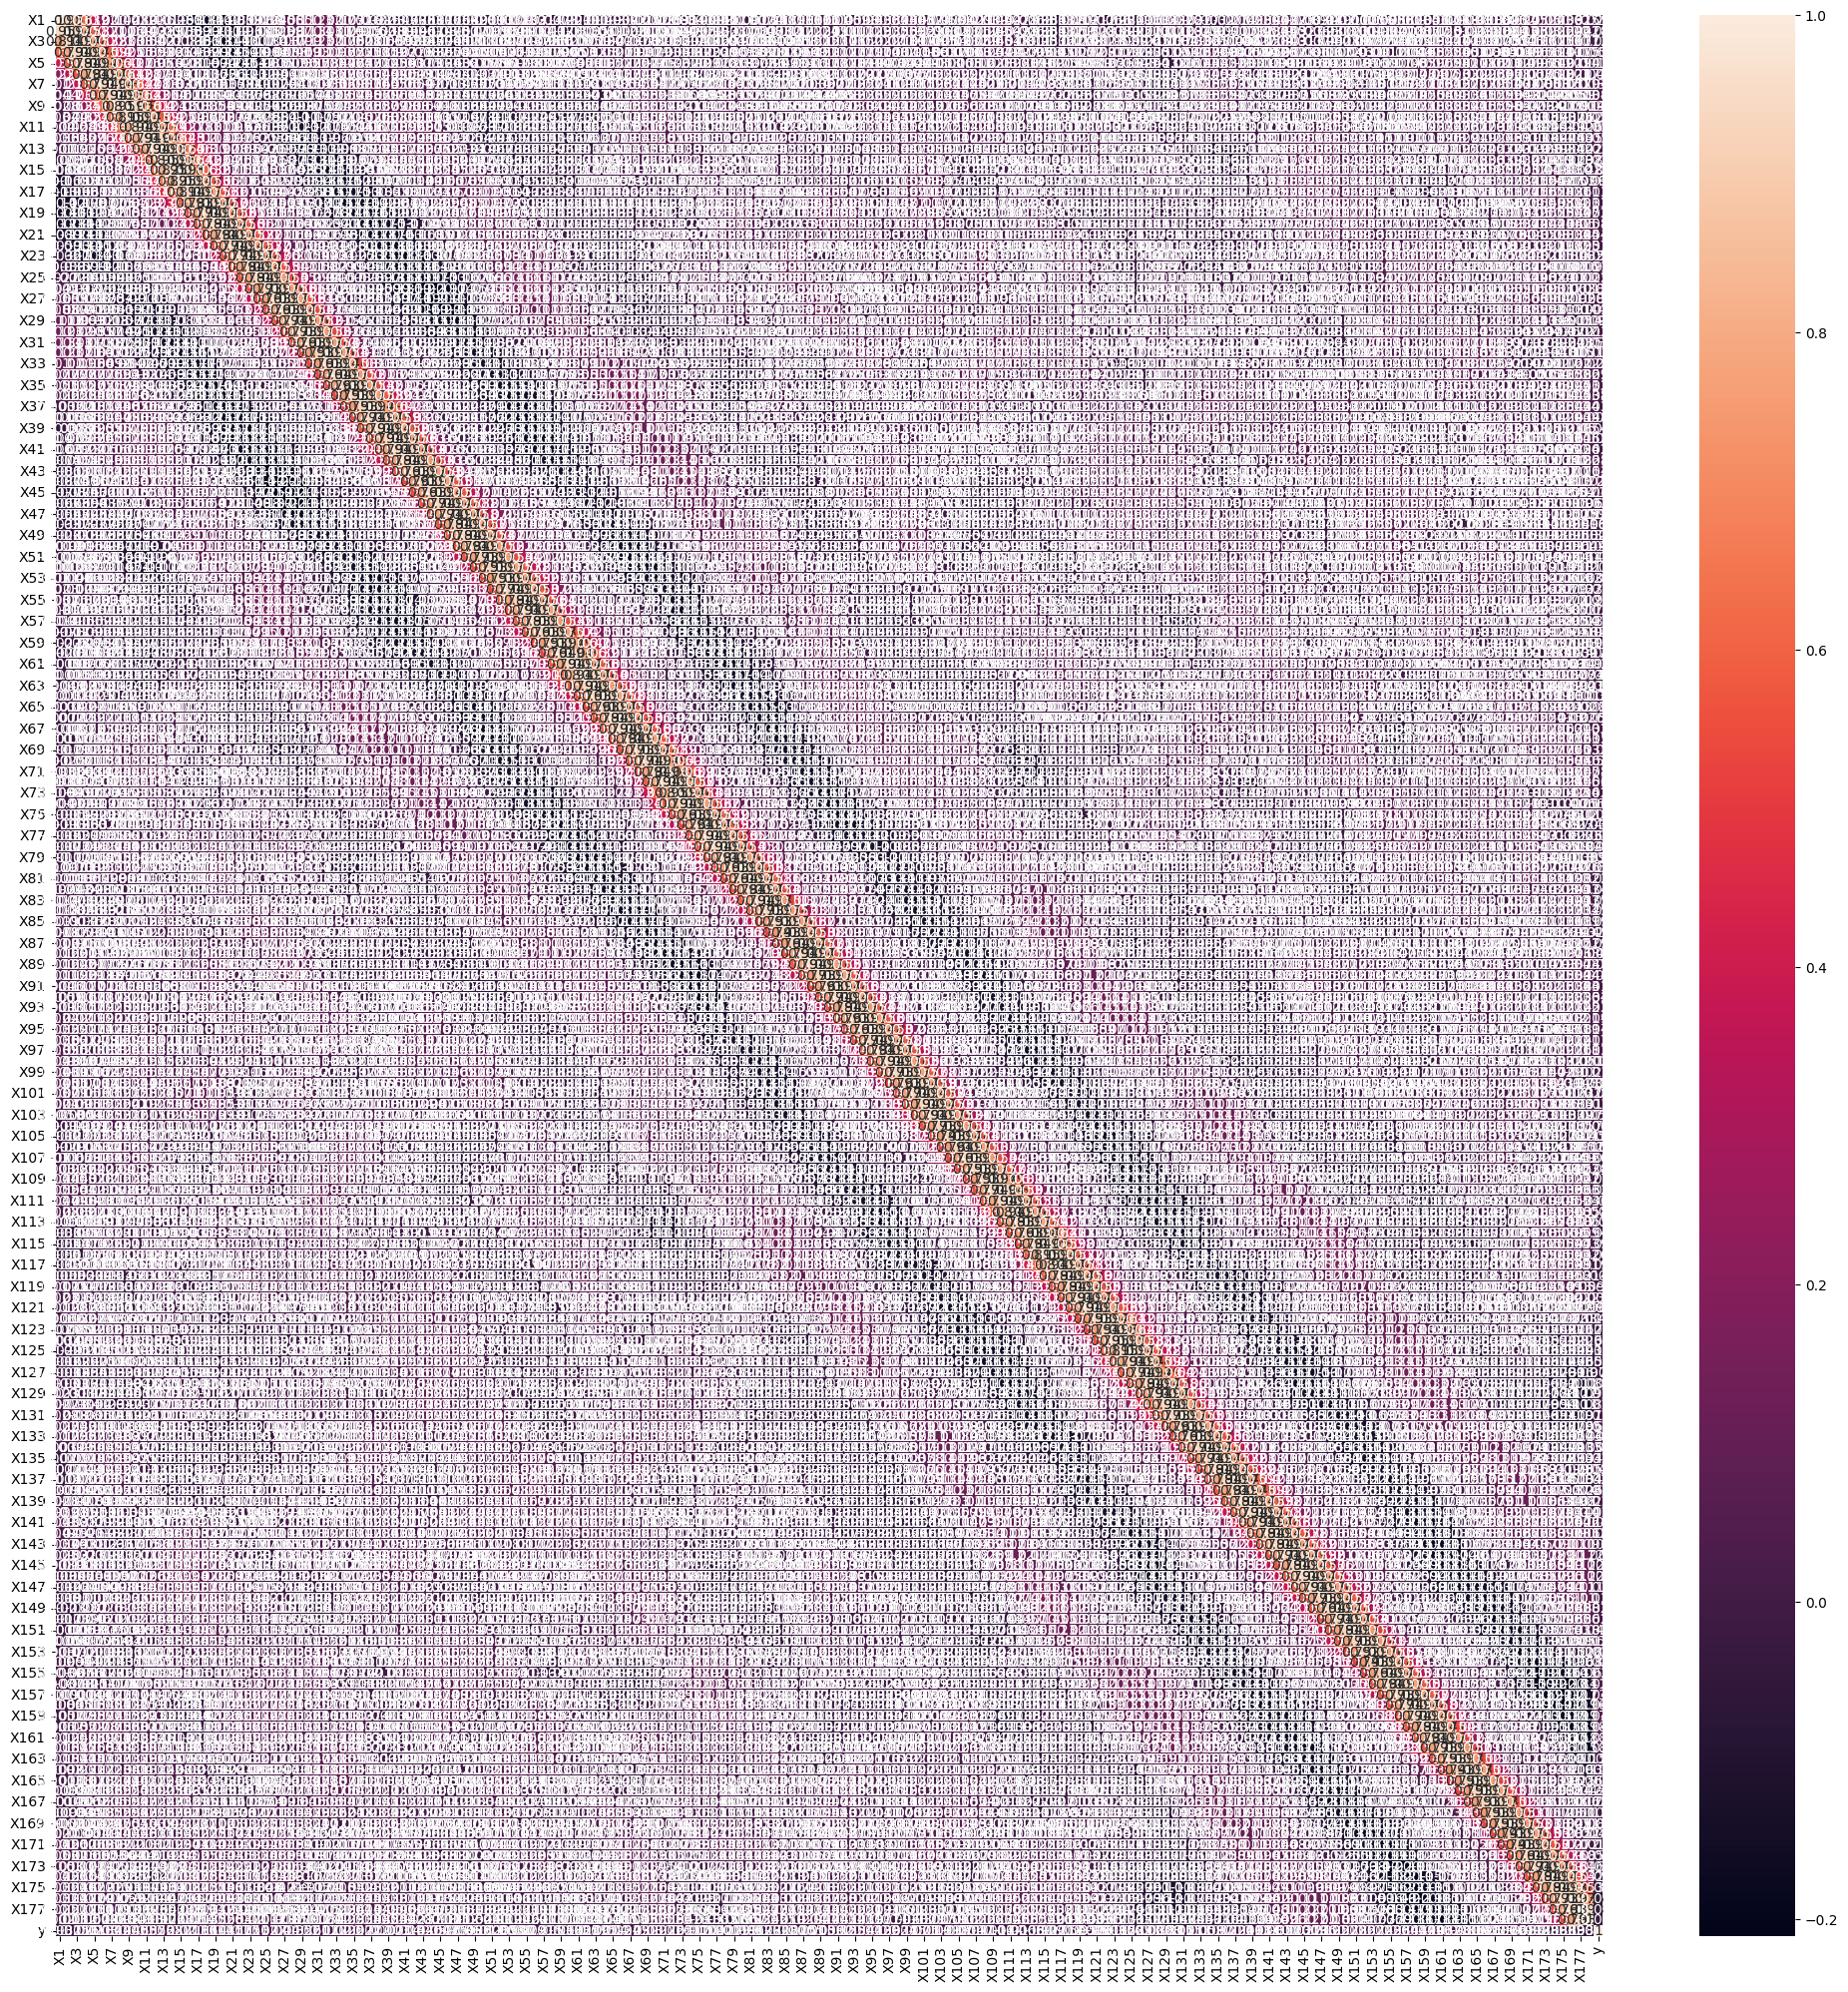

In [25]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [40]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 11500 VS Epilepttic 11500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(9200, 178), (2300, 178), (9200,), (2300,)]

In [42]:
models = [LogisticRegression(), SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          KNeighborsClassifier()]

#Check the correctness of list of classifiers and also 
model_name = [type(model).__name__ for model in models]
print(model_name)

# all parameters are not specified are set to their defaults
def classifiers(models):
    columns = ['Score', 'Predictions']
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        predictions = clf.predict(X_test)
        # Use score method to get accuracy of model
        score = clf.score(X_test, y_test)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        df_result['Predictions']['{}'.format(type(model).__name__)] = predictions
    return df_result

['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier']


In [43]:
classifiers(models)

Initialized classifier LogisticRegression with default parameters 



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:25: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when y

Score of classifier LogisticRegression is: 0.6421739130434783 

Initialized classifier SVC with default parameters 

Score of classifier SVC is: 0.9786956521739131 

Initialized classifier DecisionTreeClassifier with default parameters 



C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:25: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:26: FutureWarning:

ChainedAssignmentError: behaviour will change in pa

Score of classifier DecisionTreeClassifier is: 0.9460869565217391 

Initialized classifier RandomForestClassifier with default parameters 



C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:25: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:26: FutureWarning:

ChainedAssignmentError: behaviour will change in pa

Score of classifier RandomForestClassifier is: 0.9804347826086957 

Initialized classifier GradientBoostingClassifier with default parameters 



C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:25: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:26: FutureWarning:

ChainedAssignmentError: behaviour will change in pa

Score of classifier GradientBoostingClassifier is: 0.9665217391304348 

Initialized classifier KNeighborsClassifier with default parameters 



C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:25: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:26: FutureWarning:

ChainedAssignmentError: behaviour will change in pa

Score of classifier KNeighborsClassifier is: 0.9247826086956522 



C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:25: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\hp\AppData\Local\Temp\ipykernel_14792\776173485.py:26: FutureWarning:

ChainedAssignmentError: behaviour will change in pa

Score  \
LogisticRegression          64.22%   
SVC                         97.87%   
DecisionTreeClassifier      94.61%   
RandomForestClassifier      98.04%   
GradientBoostingClassifier  96.65%   
KNeighborsClassifier        92.48%   

                                                                  Predictions  
LogisticRegression          [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...  
SVC                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  
DecisionTreeClassifier      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...  
RandomForestClassifier      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  
GradientBoostingClassifier  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...  
KNeighborsClassifier        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [44]:
from sklearn.model_selection import KFold
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = KFold(n_splits=3, random_state=None)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971739 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.964348 (0.003849) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.968587 (0.001771) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.971739 (0.001924) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.961848 (0.002624) with: {'max_features': 'log2', 'n_estimators': 10}
0.970544 (0.003026) with: {'max_features': 'log2', 'n_estimators': 100}
0.970652 (0.003021) with: {'max_features': 'log2', 'n_estimators': 1000}


In [45]:
model=model.fit(X_train,y_train)

In [46]:
pred=model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Confusion Matrix:
 [[1814   21]
 [  25  440]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1835
           1       0.95      0.95      0.95       465

    accuracy                           0.98      2300
   macro avg       0.97      0.97      0.97      2300
weighted avg       0.98      0.98      0.98      2300



In [49]:
import pickle
pickle.dump(model, open('pipelinemodel.pkl','wb'))

In [50]:
pickle.load(open('pipelinemodel.pkl','rb'))

RandomForestClassifier()